Kaggle competition
#### House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## The Data

We will be using data from a Kaggle dataset:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### File descriptions
* train.csv - the training set  
* test.csv - the test set  
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here  
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  

#### Feature Columns
    
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  

* MSSubClass: The building class  
* MSZoning: The general zoning classification  
* LotFrontage: Linear feet of street connected to property  
* LotArea: Lot size in square feet  
* Street: Type of road access  
* Alley: Type of alley access  
* LotShape: General shape of property  
* LandContour: Flatness of the property  
* Utilities: Type of utilities available  
* LotConfig: Lot configuration  
* LandSlope: Slope of property  
* Neighborhood: Physical locations within Ames city limits  
* Condition1: Proximity to main road or railroad  
* Condition2: Proximity to main road or railroad (if a second is present)  
* BldgType: Type of dwelling  
* HouseStyle: Style of dwelling  
* OverallQual: Overall material and finish quality  
* OverallCond: Overall condition rating  
* YearBuilt: Original construction date  
* YearRemodAdd: Remodel date  
* RoofStyle: Type of roof  
* RoofMatl: Roof material  
* Exterior1st: Exterior covering on house  
* Exterior2nd: Exterior covering on house (if more than one material)  
* MasVnrType: Masonry veneer type  
* MasVnrArea: Masonry veneer area in square feet  
* ExterQual: Exterior material quality  
* ExterCond: Present condition of the material on the exterior  
* Foundation: Type of foundation  
* BsmtQual: Height of the basement  
* BsmtCond: General condition of the basement  
* BsmtExposure: Walkout or garden level basement walls  
* BsmtFinType1: Quality of basement finished area  
* BsmtFinSF1: Type 1 finished square feet  
* BsmtFinType2: Quality of second finished area (if present)  
* BsmtFinSF2: Type 2 finished square feet  
* BsmtUnfSF: Unfinished square feet of basement area  
* TotalBsmtSF: Total square feet of basement area  
* Heating: Type of heating  
* HeatingQC: Heating quality and condition  
* CentralAir: Central air conditioning  
* Electrical: Electrical system  
* 1stFlrSF: First Floor square feet  
* 2ndFlrSF: Second floor square feet  
* LowQualFinSF: Low quality finished square feet (all floors)  
* GrLivArea: Above grade (ground) living area square feet  
* BsmtFullBath: Basement full bathrooms  
* BsmtHalfBath: Basement half bathrooms  
* FullBath: Full bathrooms above grade  
* HalfBath: Half baths above grade  
* Bedroom: Number of bedrooms above basement level  
* Kitchen: Number of kitchens   
* KitchenQual: Kitchen quality  
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
* Functional: Home functionality rating  
* Fireplaces: Number of fireplaces  
* FireplaceQu: Fireplace quality  
* GarageType: Garage location  
* GarageYrBlt: Year garage was built  
* GarageFinish: Interior finish of the garage  
* GarageCars: Size of garage in car capacity  
* GarageArea: Size of garage in square feet  
* GarageQual: Garage quality  
* GarageCond: Garage condition   
* PavedDrive: Paved driveway  
* WoodDeckSF: Wood deck area in square feet  
* OpenPorchSF: Open porch area in square feet  
* EnclosedPorch: Enclosed porch area in square feet  
* 3SsnPorch: Three season porch area in square feet  
* ScreenPorch: Screen porch area in square feet  
* PoolArea: Pool area in square feet   
* PoolQC: Pool quality  
* Fence: Fence quality  
* MiscFeature: Miscellaneous feature not covered in other categories  
* MiscVal: $Value of miscellaneous feature  
* MoSold: Month Sold  
* YrSold: Year Sold  
* SaleType: Type of sale  
* SaleCondition: Condition of sale  

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
df = pd.read_csv('data/train.csv', index_col=0)
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [90]:
df.shape

(1460, 80)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Correlation

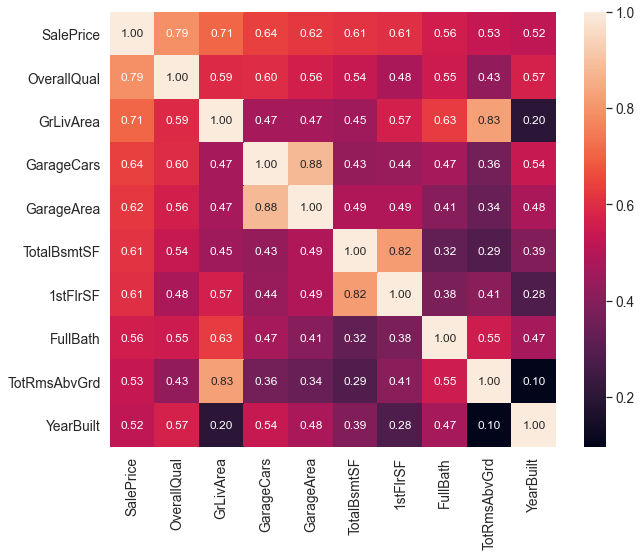

In [92]:
corrmat = df.corr()
plt.figure(figsize=(10,8))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # columns that are highest correlated to SalePrice
cm = np.corrcoef(df[cols].values.T) # correlation coefficient of columns highest correlated with SalePrice
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Combining values

#### Combine house square footage to one feature, consisting of: 
TotalBsmtSF: Total square feet of basement area  
1stFlrSF: First Floor square fee  
2ndFlrSF: Second floor square feet  
GrLivArea: Above grade (ground) living area square feet

In [93]:
#Add a new column totalSF
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']

#### Space for cars:  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
Because they both represent the area for cars, though in different ways, we will remove one. We will remove GarageArea because GarageCars has a higher correlation with SalePrice as seen on above heatmap. 

#### Combine the number of bathrooms: 
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  

In [94]:
#adding a new column TotalBaths
df['TotalBaths'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']

#### Remodeling
Find houses where the year built and remodeling is the same, which means no remodeling actually happened.  
Create a new feature for how old was the house(how many years from being built or remodeled) when sold.   
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
YrSold: Year Sold

In [95]:
# Add new features
df['Remodeled'] = np.where(df['YearRemodAdd'] == df['YearBuilt'], 'No', 'Yes') # No for houses that were never remodeled
df['Age when Sold'] = df['YrSold'] - df['YearRemodAdd'] # how many years after being remodeled is the house sold

### Drop features that were combined

In [96]:
basement_cols = [col for col in df.columns if 'Bsmt' in col]

In [97]:
remove_cols = basement_cols+['1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath', 'GarageArea', 'YearRemodAdd','YearBuilt','YrSold']

In [98]:
remove_cols 

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'GarageArea',
 'YearRemodAdd',
 'YearBuilt',
 'YrSold']

In [99]:
df.drop(remove_cols, axis=1, inplace=True)

# Dealing with missing values

### Remove columns with more than 50% of missing data

In [100]:
"""
A function to find columns where there is more than 50% of data missing. 
We will compare the number of available data to all rows in the column to find the percentage of missing data. 
We'll return a list of column names where available data is lower than 50%.
"""
def missingvalues(df):
    missing_values = []
    for column in df:
        notnull = sum(df[column].notnull())
        l = len(df)
        available_data = notnull/l*100
        if available_data < 50: 
            missing_values.append(column)
    return missing_values

In [101]:
cols_miss = missingvalues(df)
# Columns missing more than 50% of data
print(cols_miss)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [102]:
# Delete found columns
df = df.drop(cols_miss, axis=1)

### Check for low variance

In [103]:
"""
A function to find low variance data. 
Checks if the most recurrent value of the feature is repeated in almost all instances. 
x is percentage of uniform values. 
Return a list of column names where data is same for x%. 
"""
def low_variance(df, x):
    low_var = []
    for i in df.columns:
        counts = df[i].value_counts()
        top = counts.iloc[0]
        if top / len(df) * 100 > x:
            low_var.append(i)
    return low_var

In [104]:
# 90% of data is the same
cols_low = low_variance(df, 90)
print(cols_low)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [105]:
# Drop columns with low variance
df = df.drop(cols_low, axis=1)

### Decide what to do with rest of missing values

In [106]:
# NaN values
null_values = df.isnull().sum().sort_values(ascending=False).head(10)
print(null_values)

FireplaceQu     690
LotFrontage     259
GarageFinish     81
GarageType       81
GarageQual       81
GarageYrBlt      81
MasVnrArea        8
MasVnrType        8
Exterior2nd       0
Exterior1st       0
dtype: int64


In [107]:
# numerical data types i.e int64/float, should be imputed or filled
[col for col in null_values.index if df[col].dtype not in ['object']]

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [108]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)
df['MasVnrType'].fillna('NA', inplace = True)
df.drop('FireplaceQu', axis=1, inplace=True)
df.drop('BedroomAbvGr', axis=1, inplace=True) 

df['GarageQual'].fillna('NA', inplace = True)
df['GarageFinish'].fillna('NA', inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace = True)
df['GarageType'].fillna('NA', inplace = True)

In [120]:
# categorical
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('category') # was imputed now turned to a category

In [121]:
# turning object columns into category columns
# it's a good practice to typecast categorical features to a category dtype because 
# they make the operations on such columns much faster than the object dtype.
for i in df.select_dtypes(include='object').columns.to_list():
    df[i] = df[i].astype('category')

In [193]:
# list with categorical variables
cat_cols = df.select_dtypes(include='category').columns.to_list()
print(len(cat_cols))
cat_cols

26


['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'MoSold',
 'SaleType',
 'SaleCondition',
 'Remodeled']

/Users/helenahook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


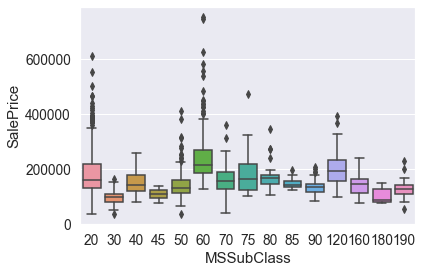

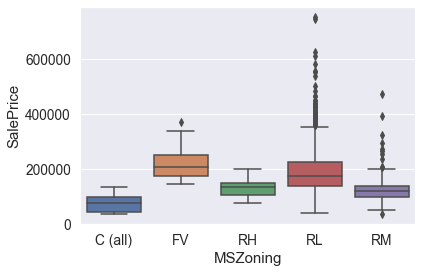

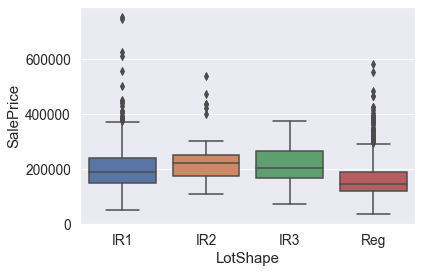

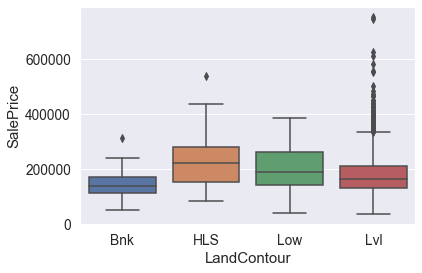

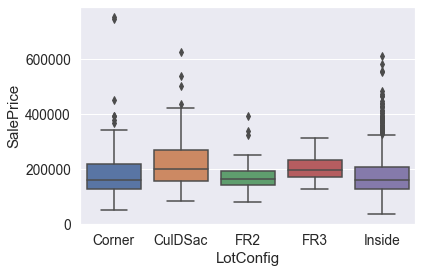

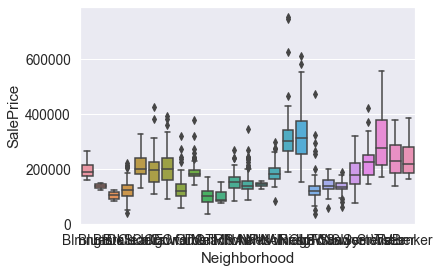

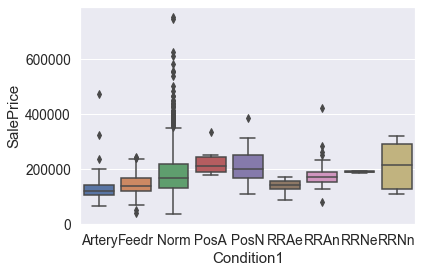

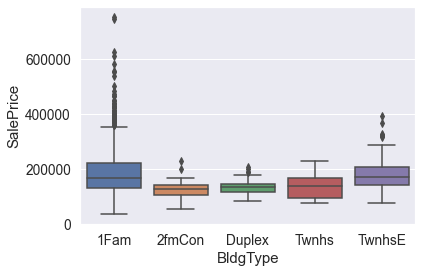

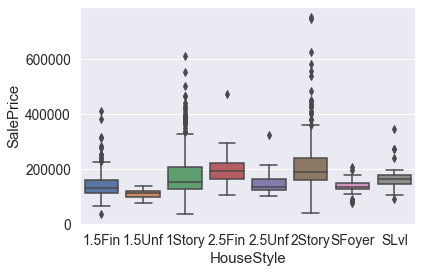

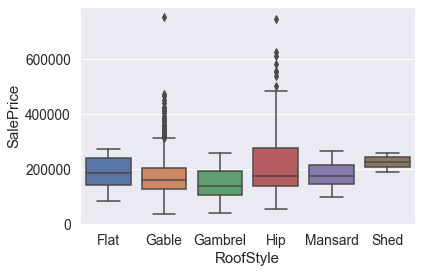

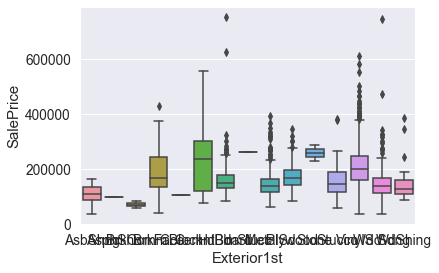

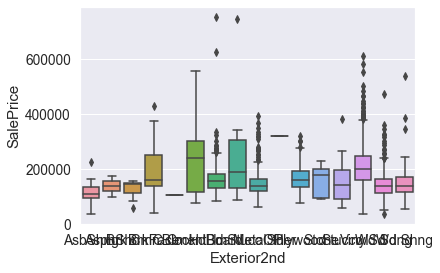

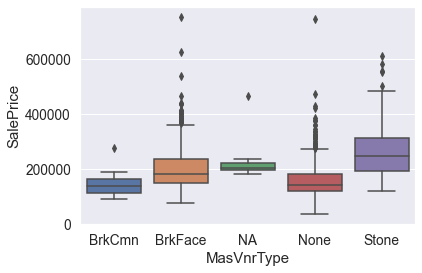

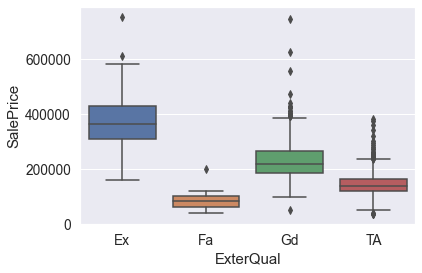

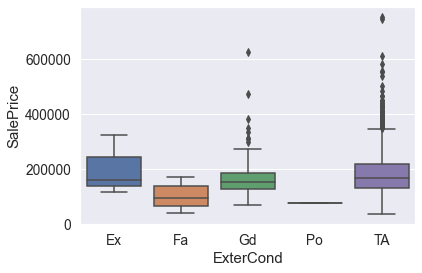

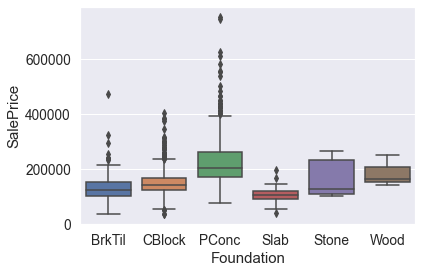

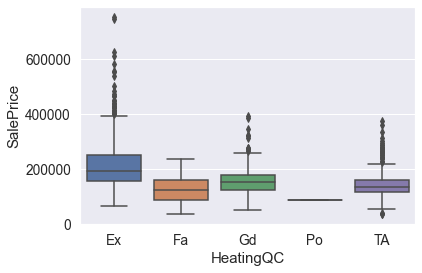

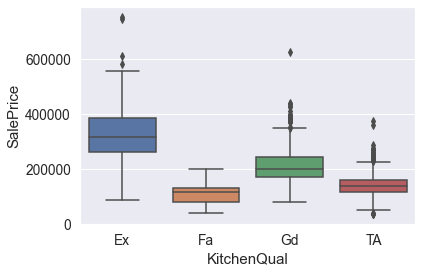

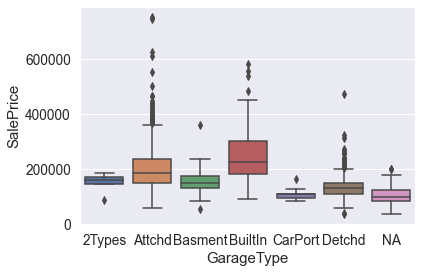

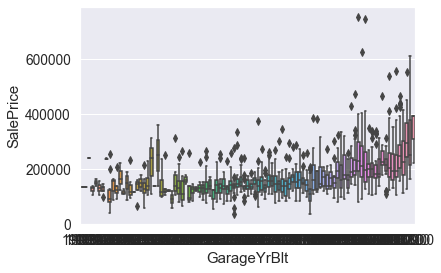

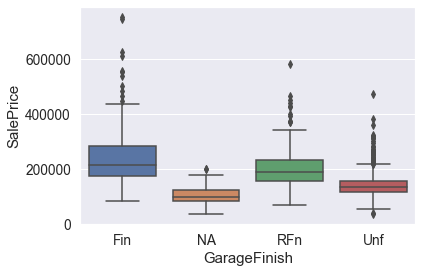

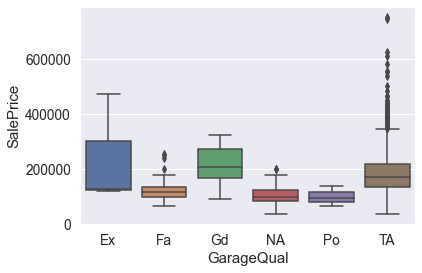

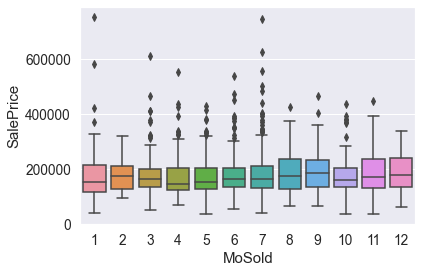

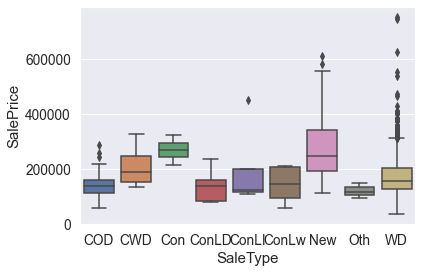

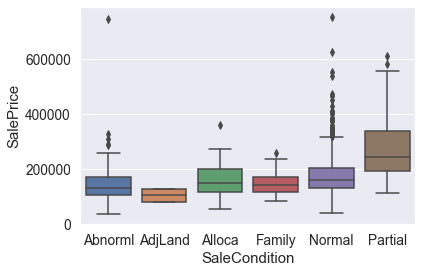

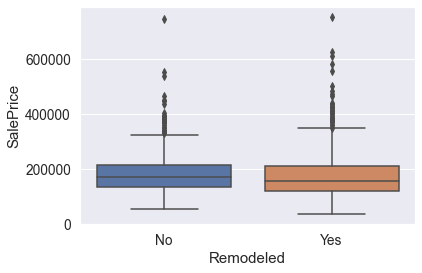

In [62]:
# categorical variables vs. SalePrice
for cols in cat_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = df)

In [63]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

### Check correlation with SalePrice

In [125]:
# Variables correlation with Sale Price
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.777123
GarageCars       0.640409
TotalBaths       0.631731
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
LotFrontage      0.334771
WoodDeckSF       0.324413
OpenPorchSF      0.315856
LotArea          0.263843
OverallCond     -0.077856
EnclosedPorch   -0.128578
Age when Sold   -0.509079
Name: SalePrice, dtype: float64

In [126]:
# features to remove based on low correlation to saleprice
df.drop(['EnclosedPorch', 'OverallCond'], axis=1, inplace=True)

## Outliers

<AxesSubplot:>

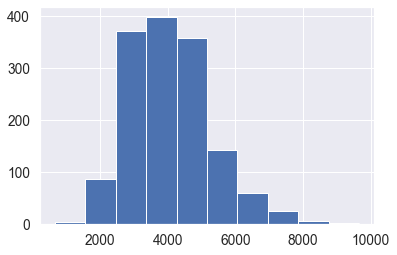

In [167]:
df['TotalSF'].hist()

In [168]:
df[df['TotalSF']>10000]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBaths,Remodeled,Age when Sold
Id,,,,,,,,,,,,,,,,,,,,,


<AxesSubplot:>

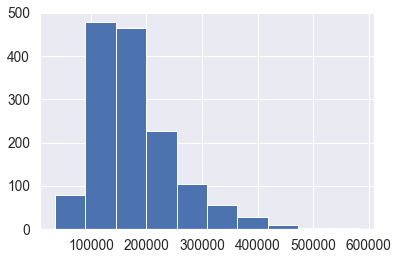

In [176]:
df['SalePrice'].hist()

In [179]:
df[df['SalePrice']>500000]['SalePrice']

Id
179     501837
441     555000
770     538000
804     582933
1047    556581
Name: SalePrice, dtype: int64

In [182]:
# Seems that removing a house with TotalSF > 10000 is a good idea
df.drop(df[df['TotalSF']>10000].index, inplace = True)
# Same for SalePrice > 500000
df.drop(df[df['SalePrice']>500000].index, inplace = True)

## Feature engineering on the test set

In [200]:
test = pd.read_csv('data/test.csv', index_col=0)
test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [202]:
test.shape

(1459, 79)

## Encoding categorical features using dummy variables

In [194]:
df.shape

(1449, 39)

In [195]:
# number of categorical variables
len(cat_cols) 

26

### Combine train and test set to do encoding